# HW1 Classifier Models and sklearn

## The Problem

Our overall goal is to build classifier models to predict `price_gt_1M` using the the other variables. You must use sklearn Pipelines that contain your preprocessing steps and your model estimation step. We did this in the class notes. You should do your work in a Jupyter Notebook.

### Task 1 and 2 - Done

### Task 3 - EDA - SEE MODEL EXPLORATION EXAMPLE

I suggest you start by reading the csv file into a pandas dataframe. I called my dataframe, `housing_df`.
Then start with some basic EDA. You can certainly use automated tools such as pandas-profiling, skimpy or SweetViz as I showed in the class notes. Remember, when you run some of those tools, you **must** have your notebook open in the classic Jupyter Notebook interface (and **NOT** in Jupyter Lab) Check their docs to see if Jupyter Lab is supported yet. I pip installed SweetViz and it seems to be working fine now with Jupyter Lab. As we've seen, the reports get created as HTML documents. These should go in your output folder within your project.

### Preliminaries

In [4]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [7]:
# for pandas profiling report
# pip install ydata-profiling

In [9]:
# for sweetviz
# pip install sweetviz

In [11]:
import numpy as np
import pandas as pd
#from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from IPython.display import Image
#import sweetviz

In [13]:
%matplotlib inline

I suggest you start by reading the csv file into a pandas dataframe. I called my dataframe, `housing_df`.

### Load data from csv

In [17]:
housing_df = pd.read_csv('./data/kc_house_data_classification.csv')

In [19]:
# gives head and tail rows
housing_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0


Then start with some basic EDA. You can certainly use automated tools such as pandas-profiling, skimpy or SweetViz as I showed in the class notes. Remember, when you run some of those tools, you **must** have your notebook open in the classic Jupyter Notebook interface (and **NOT** in Jupyter Lab) Check their docs to see if Jupyter Lab is supported yet. I pip installed SweetViz and it seems to be working fine now with Jupyter Lab. As we've seen, the reports get created as HTML documents. These should go in your output folder within your project.

**Both pandas-profiling and sweetviz worked in Jupyter Lab**

In [22]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

**All of the data types are float (may have decimal values) or integer (no decimal values)**

In [25]:
housing_df.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price_gt_1M        int64
dtype: object

### pandas Profiling Report

In [395]:
# Developed and saved pandas profiling report
# profile = ProfileReport(housing_df, title="Profiling Report")
# profile.to_file("output/pandas_profiling_report.html")

### sweetviz Report

In [31]:
# developed and saved sweetviz report
# report = sweetviz.analyze(housing_df)
# report.show_html("output/sweetviz_report.html")

### Observations:

 - Initial data types are float and integer
 
 - Categorical columns should be (other than price_gt_1M): waterfront, zipcode
 
 - Decisions made: I struggle with bedrooms, bathrooms and floors - even though they are a count, you cannot have 3.5 bedrooms, or 1.75 floors - the counts provide a specific label. I decided to keep them numeric for the homework, and also referenced: 
 
https://www.kaggle.com/code/tomasmantero/predicting-house-prices-keras-ann

The pandas Profiling Report listed four as categorical: waterfront, view, condition and price_gt_1M

The sweetviz_report listed five as categorical: floors, waterfront, view, condition and price_gt_1M

 - Blank, null or empty values: Profiling report showed no missing cells, 183 duplicate rows; sweetviz showed no missing values, 184 duplicates 
 
 - A few Variable observations: 
Most common number of bedrooms is 3 - there definitely appears to be errors in some of the bedroom counts (33 bedrooms in a 1,620 sq ft house and only 1.75 bathrooms?? Yikes...sounds like a typical family holiday)

Most common number of bathrooms is 2.5 (unfortunately there are 10 houses without bathrooms, and 13 homes with no bedrooms - hopefully they have a comfortable futon and live next door to a 24 hour gas station, I used to be a residential real estate appraiser...brings back memories)

General statement - most common is a 3 bedroom, 2.5 bath, 1 floor, no basement, non-waterfront, 0 view and 3 condition ratings, not renovated, priced lower than $1M home

I'm going with all the records, but there is probably room for more outlier cleanup:

https://medium.com/swlh/rudimentary-data-cleaning-techniques-using-king-county-wa-housing-dataset-f7716bdf827e 

### Correlations - Features most correlated (before finalizing the categorical variables):

<Axes: title={'center': 'Pearson Correlation Matrix'}>

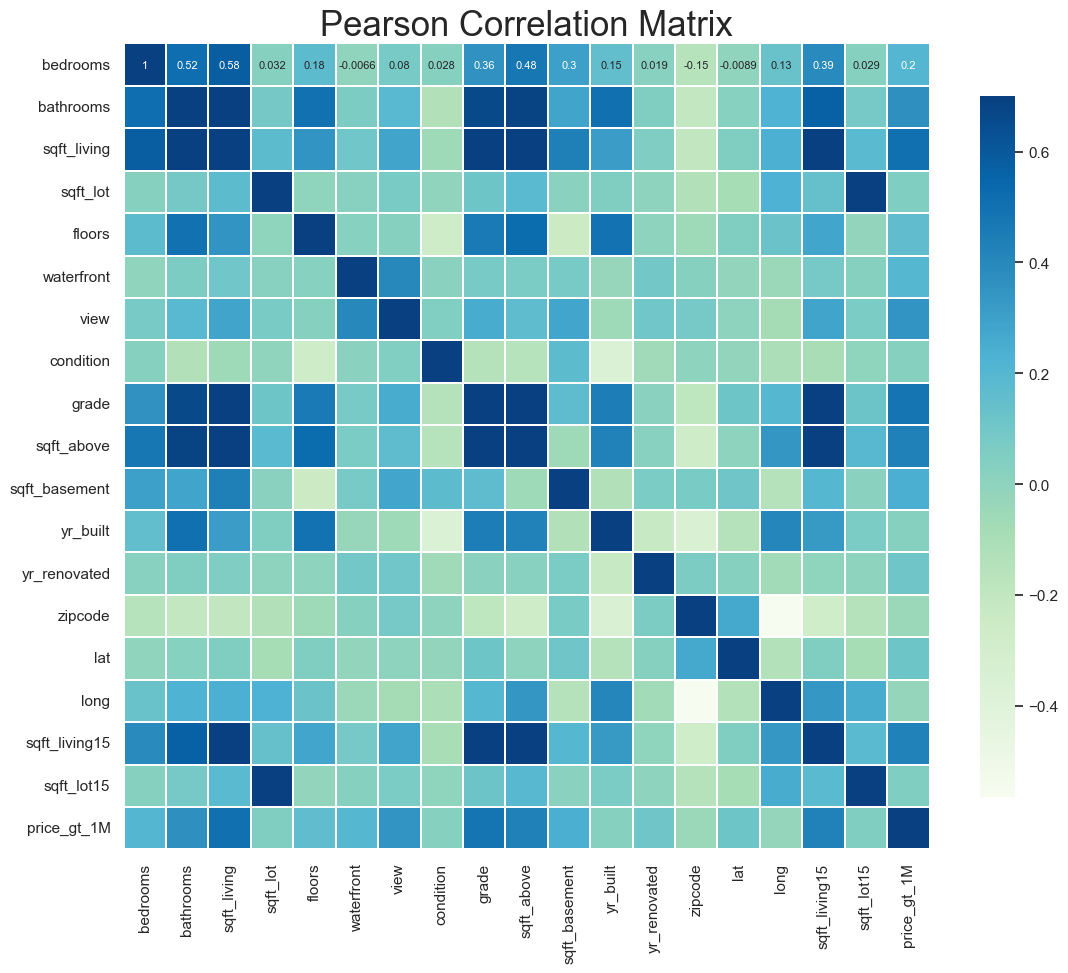

In [35]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix', fontsize=25)
sns.heatmap(housing_df.corr(), linewidths=0.25, vmax=0.7, square=True, cmap="GnBu", linecolor='w', 
            annot=True, annot_kws={"size":8}, cbar_kws={"shrink": .7})

# Seems there is a known issue with seaborn and placing all of the values - could downgrade and try but just leaving as is

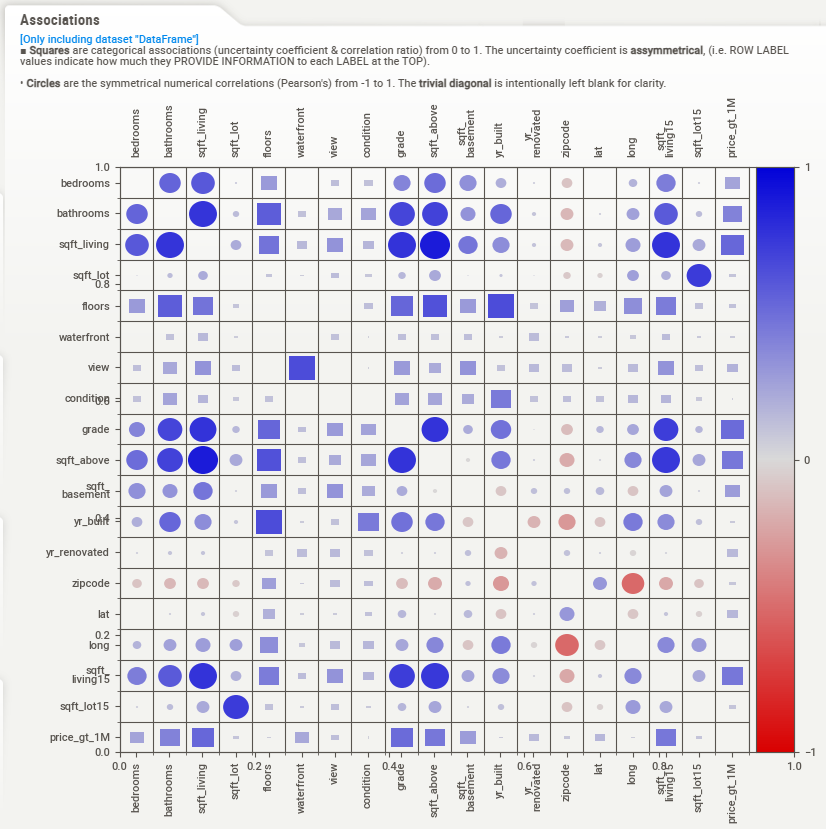

In [37]:
Image(filename = 'images/sweetviz_associations.PNG')

**From the sweetviz association grid, sqft_above and sqft_living shows the highest correlation, with grade, bathrooms and sqft_living15 showing high correlations as well**

### Task 4 - Categorize feature types

As we did in the Pump it Up class notes, we are going to need to create a list of categorical variables and a list of numeric variables so that we
can apply the appropriate pre-processing to each. In the notes we used the data type of the columns to create lists of numeric and categorical variables. That's not necessarily going to work here as all the variables will come in as numeric. So, you'll have to come up with another way to create lists of the categorical variables and the numeric variables. 

Since we are using regularization, all of the numeric variables will need to rescaled using the `StandardScaler`. You'll do this later as part of the `Pipeline`.   

Even though our target variable, `price_gt_1M`, is categorical, you do **NOT** need to do any preprocessing on it. As I mentioned in our class notes, scikit-learn will automatically detect that and will do any encoding needed on its own.

**I changed the type of waterfront to "category", I'm not sure why that wouldn't work as an option?**
**At the end of the homework I "lumped" the zip codes - I think if that were going to be done in a "real" situation, we would need to lump them in a way that would group similar demographics, I just lumped them based on the first three digits to reduce the number to 2 - you may have wanted us to do that in the beginning, but I ran everything with my original thought process**

#### Preprocessing
For any variables that you decide should be treated as categorical in your models, use the `OneHotEncoder` on them in the preprocessing stage.

Be careful, just because a variable has a numeric datatype in the pandas dataframe, it does **not** mean that it's necessarily a numeric variable in the context of the classification models. Think about each column and look at your EDA reports and decide whether or not it's truly numeric or needs to be treated as categorical data in the models.


* I broke up the `housing_df` into two separate dataframes that I called `X` and `y`, to use in the models. Here's my code for that:
```
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]
```

In [44]:
# drop zip code and change waterfront to categorical, rest remain numeric
housing_df2 = housing_df.drop('zipcode',axis=1)
housing_df2["waterfront"] = housing_df2["waterfront"].astype("category")

In [46]:
housing_df2.dtypes

bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
price_gt_1M         int64
dtype: object

I decided to drop zip code since we have lat long, none are lumped

In [49]:
# Creating the initial X and y
X = housing_df2.iloc[:, 0:17]
y = housing_df2.iloc[:, 17]

In [51]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  int64   
 1   bathrooms      21613 non-null  float64 
 2   sqft_living    21613 non-null  int64   
 3   sqft_lot       21613 non-null  int64   
 4   floors         21613 non-null  float64 
 5   waterfront     21613 non-null  category
 6   view           21613 non-null  int64   
 7   condition      21613 non-null  int64   
 8   grade          21613 non-null  int64   
 9   sqft_above     21613 non-null  int64   
 10  sqft_basement  21613 non-null  int64   
 11  yr_built       21613 non-null  int64   
 12  yr_renovated   21613 non-null  int64   
 13  lat            21613 non-null  float64 
 14  long           21613 non-null  float64 
 15  sqft_living15  21613 non-null  int64   
 16  sqft_lot15     21613 non-null  int64   
dtypes: category(1), float64(4), int

In [55]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: price_gt_1M
Non-Null Count  Dtype
--------------  -----
21613 non-null  int64
dtypes: int64(1)
memory usage: 169.0 KB


**Confirm no columns were missed:**

In [58]:
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

all_cols = X.columns.tolist()

In [412]:
assert len(all_cols) == len(categorical_cols) + len(numeric_cols), 'each col should either be in categorical or numeric lists'

In [60]:
numeric_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [62]:
categorical_cols

['waterfront']

In [64]:
numeric_cols_idx = [X.columns.get_loc(c) for c in numeric_cols]
numeric_cols_idx

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [66]:
categorical_cols_idx = [X.columns.get_loc(c) for c in categorical_cols]
categorical_cols_idx

[5]

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from IPython import display
from sklearn.tree import DecisionTreeClassifier

```
* Please use the following code for your data partitioning so that we all end up with the same training and test split:
```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)
```

### Pipeline for Steps 1 and 2

In [72]:
# Pipeline - l1 - C=1
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [74]:
# This is from the new 1.0 ColumnTransformer example. 
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront'])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=500, penalty='l1',
                                    solver='saga'))])

#### Model 0: The null model

We always start with the simplest possible model and we call it the *null model*. For binary classification models, the null model is usually just to predict that each observation will fall into whichever class is most prevalent. In other words, what would be the performance of a model in which we just predict 0 for everyone? Scikit-learn has a way to create simple null models for classification with the `sklearn.dummy.DummyClassifier` class. See https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html for the details. You must use this class to create your null model.

In [427]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.9327356853672644

***The null model has a high score, but not perfect - we would want to see if the regularization models improves the score, without overfitting***

In [80]:
# Further partition our training data into train and test sets to use for model fitting and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

#### Model 1: Ridge regression l2 with C=1.0

Build a ridge regression model to predict `price_gt_1M` and use the default value of `C=1.0`. I used the following additional options with the `LogisticRegression` model - `solver='saga', max_iter=2000`. Feel free to change these if you want. AFter fitting the model, compute its accuracy score for training and test and write out a little summary (f-strings are useful).

***I missed the max_iter=2000 and stuck with 500, I did try changing one to 2000 and didn't see any difference***

In [431]:
# Pipeline - l2 - C=1
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_l2_c1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [433]:
# Fit model on new training data - notice that clf is actually the Pipeline - l2 - C=1
clf_l2_c1.fit(X_train, y_train)

print(f"Training score: {clf_l2_c1.score(X_train, y_train):.3f}")
print(f"Test score: {clf_l2_c1.score(X_test, y_test):.3f}")

Training score: 0.961
Test score: 0.960


Create a plot of the coefficients (as we did in the notes). If you want to use that `coef_plot` function we used in the notes, you'll have
to make a few modifications because we only have one set of coefficients (since we have a binary classification problem as opposed to a 3-class problem in Pump it Up).

***I couldn't get the model_exploration example to work with a single array, so I made up my own version***

In [89]:
clf_l2_c1.named_steps['classifier'].coef_.shape

(1, 18)

In [91]:
clf_l2_c1.steps[1]

('classifier', LogisticRegression(C=1, max_iter=500, solver='saga'))

In [93]:
clf_l2_c1.steps[1][1].coef_

array([[-0.04983995,  0.3352116 ,  0.47652436,  0.04223846, -0.00556717,
         0.24624789,  0.40370664,  1.37741908,  0.44325068,  0.15976965,
        -0.44470848,  0.15496762,  0.75385698, -0.8511276 ,  0.40861624,
        -0.08948663, -2.07208215,  0.12892345]])

In [95]:
def coef_plot(model, title=None):
    data = model.steps[1][1].coef_
    
    if title:
        plt.title(title)  
        
    plt.plot(data.flatten())  # Flattening the array to plot as a single line
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()


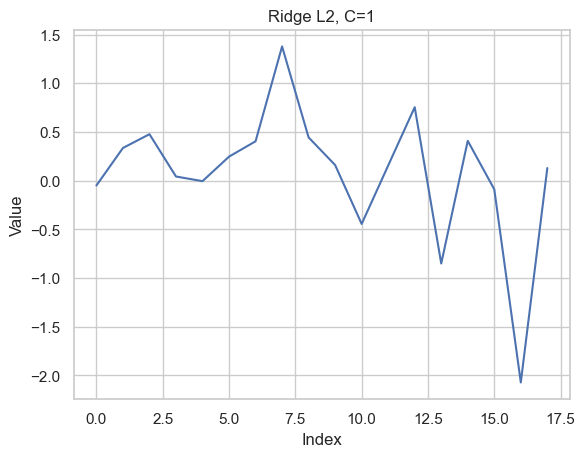

In [97]:
coef_plot(clf_l2_c1, 'Ridge L2, C=1')

Create confusion matrices for both training and test.

In [100]:
clf_l2_c1['classifier'].classes_

array([0, 1], dtype=int64)

Confusion matrix for train, without normalization
[[15947   180]
 [  494   669]]
Normalized confusion matrix for train
[[0.98883859 0.01116141]
 [0.42476354 0.57523646]]


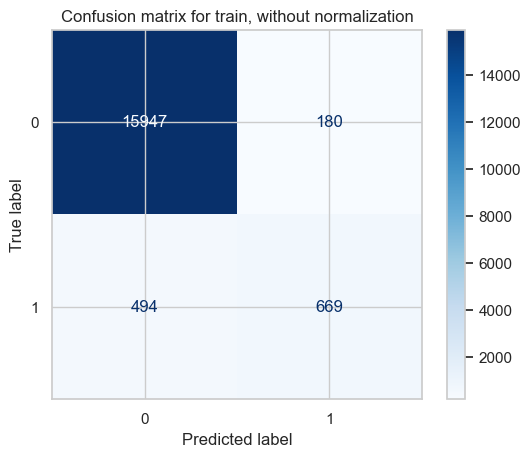

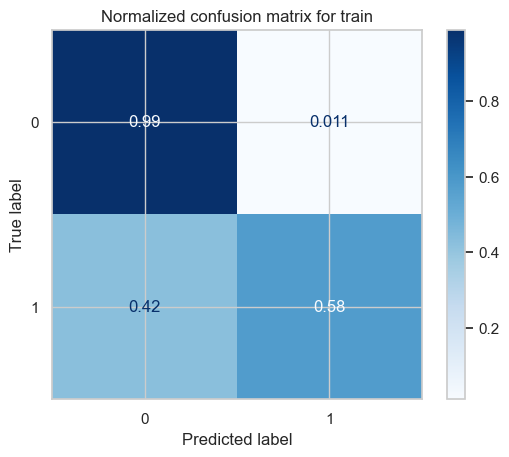

In [102]:
# Confusion matrix for Train
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_l2_c1['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_l2_c1, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3942   52]
 [ 124  205]]
Normalized confusion matrix for test
[[0.98698047 0.01301953]
 [0.3768997  0.6231003 ]]


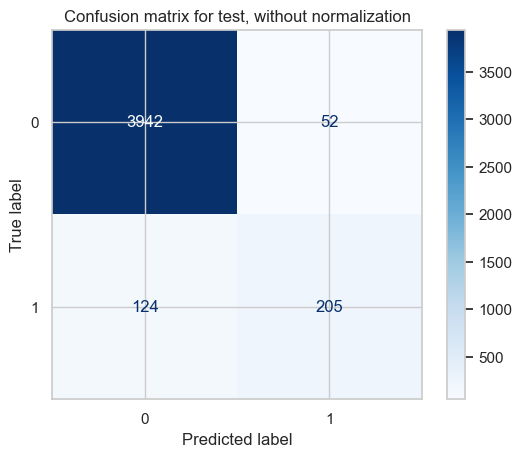

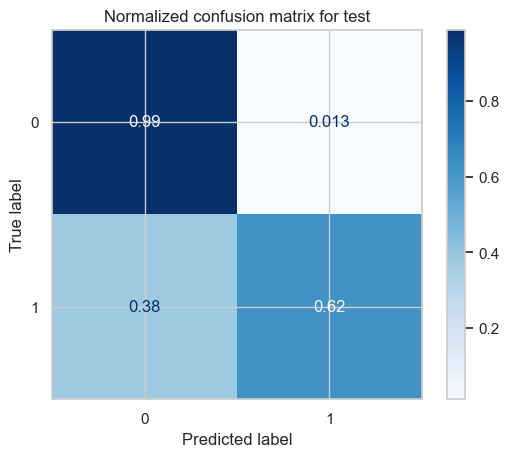

In [104]:
# Confusion matrix for Test
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf_l2_c1['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_l2_c1, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Model 2: Lasso regression with C=1.0

Same as Model 1, but use lasso regression instead of ridge regression. Create the same outputs and compare the performance to the ridge regression model.

In [107]:
# Pipeline - l1 - C=1
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_l1_c1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [109]:
# Fit model on new training data - notice that clf is actually the Pipeline - l1 - C=1
clf_l1_c1.fit(X_train, y_train)

print(f"Training score: {clf_l1_c1.score(X_train, y_train):.3f}")
print(f"Test score: {clf_l1_c1.score(X_test, y_test):.3f}")

Training score: 0.961
Test score: 0.960


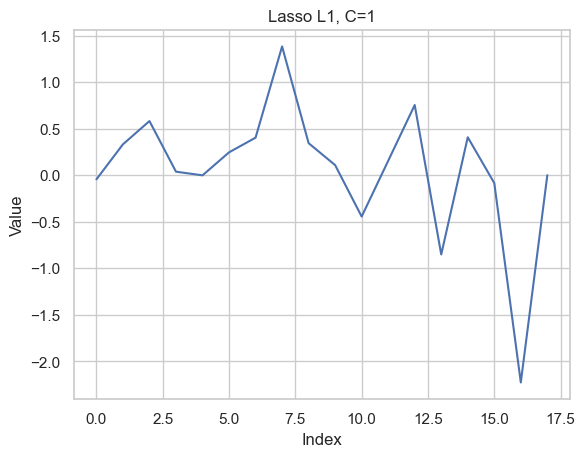

In [111]:
coef_plot(clf_l1_c1, 'Lasso L1, C=1')

Confusion matrix for train, without normalization
[[15947   180]
 [  494   669]]
Normalized confusion matrix for train
[[0.98883859 0.01116141]
 [0.42476354 0.57523646]]


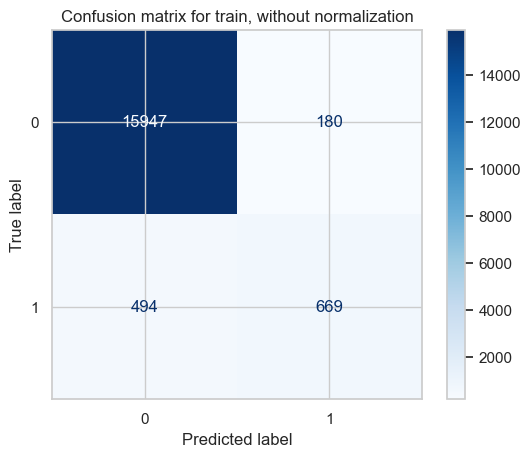

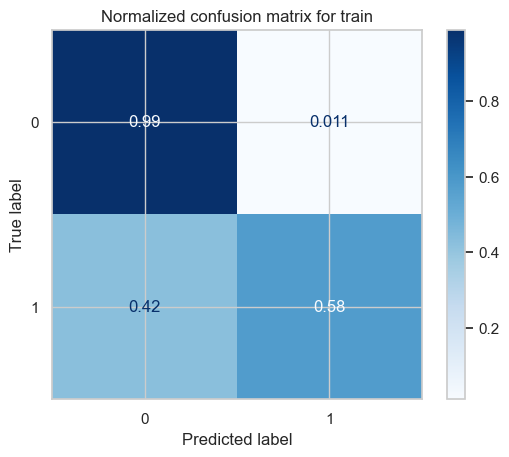

In [113]:
# Confusion matrix for Train
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_l1_c1['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_l1_c1, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3942   52]
 [ 123  206]]
Normalized confusion matrix for test
[[0.98698047 0.01301953]
 [0.37386018 0.62613982]]


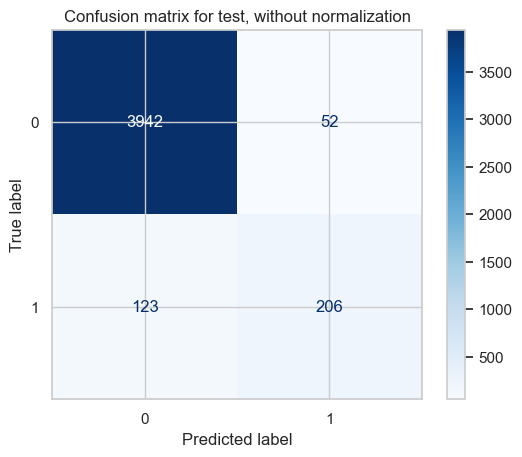

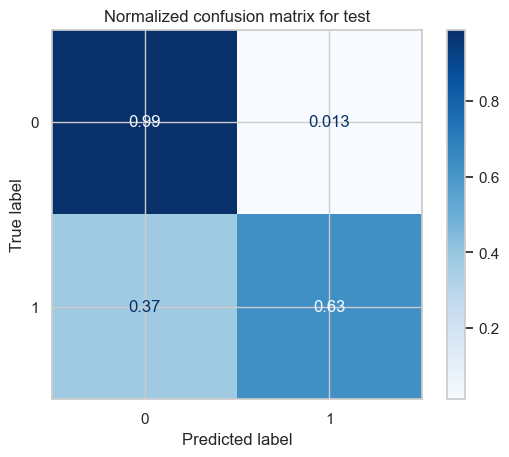

In [115]:
# Confusion matrix for Test
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf_l1_c1['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_l1_c1, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Model 3: Lasso regression with C=0.01

Fit another lasso regression but use `C=0.01`. Does this enforce more or less regularization? Create the same outputs and compare the performance to the first two models. Discuss why the plot looks so different than the previous plots.

***The C value was lowered from 1.0 to .01 - the lower the value the higher the regularization***

In [118]:
# Pipeline - l1 - C=0.01
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_l1_c01 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [120]:
# Fit model on new training data - notice that clf is actually the Pipeline - l1 - C=0.01
clf_l1_c01.fit(X_train, y_train)

print(f"Training score: {clf_l1_c01.score(X_train, y_train):.3f}")
print(f"Test score: {clf_l1_c01.score(X_test, y_test):.3f}")

Training score: 0.959
Test score: 0.959


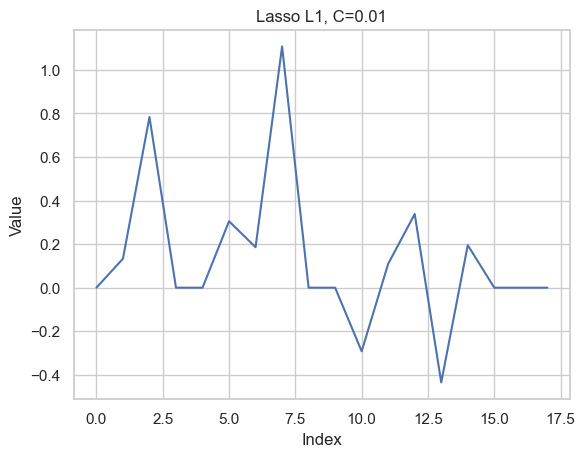

In [122]:
coef_plot(clf_l1_c01, 'Lasso L1, C=0.01')

Confusion matrix for train, without normalization
[[16001   126]
 [  583   580]]
Normalized confusion matrix for train
[[0.99218702 0.00781298]
 [0.50128977 0.49871023]]


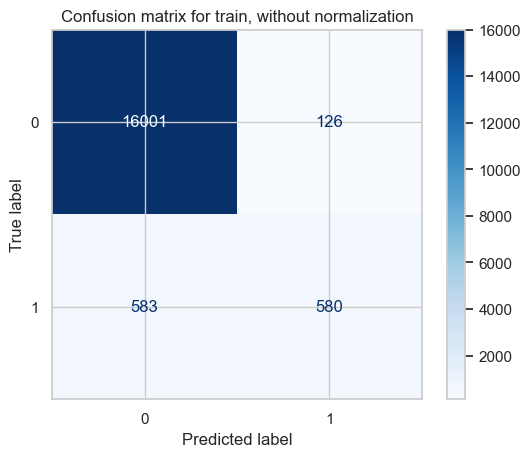

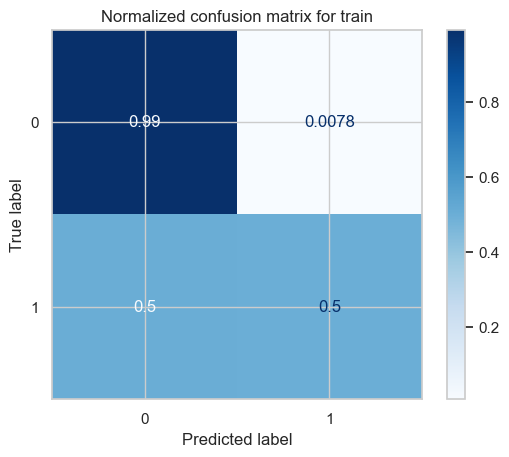

In [124]:
# Confusion matrix for Train
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_l1_c01['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_l1_c01, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3968   26]
 [ 150  179]]
Normalized confusion matrix for test
[[0.99349024 0.00650976]
 [0.45592705 0.54407295]]


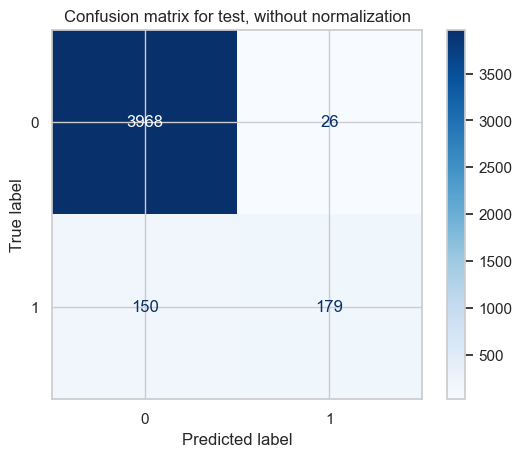

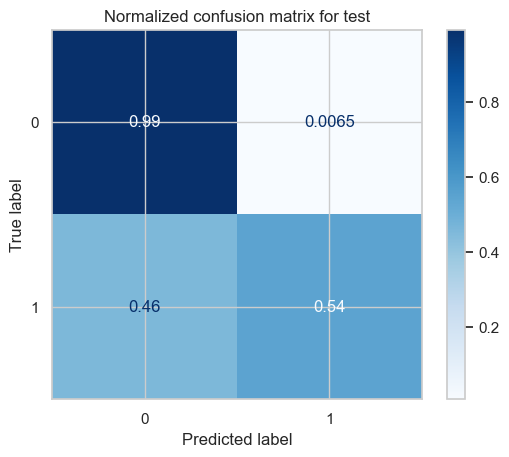

In [126]:
# Confusion matrix for Test
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf_l1_c01['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_l1_c01, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Model 4: Lasso regression with optimal C value

Now use `LogisticRegressionCV` to fit a model and let sklearn determine the optimal `C` value to use. Again, compute the accuracy score and confusion matrices. Also, print out the optimal value of `C`. Does regularization help for this problem?

***Regularization does improve the models over the null model, and smaller C value means higher regularization - next on my reading list:***

https://medium.com/@agrawalsam1997/regularization-in-logistic-regression-3d854e79f07d#:~:text=Logistic%20Regression%20is%20a%20machine,C%20value%20means%20higher%20regularization

https://medium.com/@shuv.sdr/decision-tree-classification-in-python-b1e59205949c

### Using cross-validation to find good hyperparameter values
One nice feature of sklearn is that it builds in some useful tools like automating the process of using cross-validation to find optimal hyperparameter values. For logistic regression, there is a [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html?highlight=logisticregressioncv#sklearn.linear_model.LogisticRegressionCV) function that will search over a grid of values for $C$ and find the best value. You just literally replace `LogisticRegression` with `LogisticRegressionCV` in the obvious place in our code. 

The sklearn [User Guide has a nice section on tuning hyperparameters](https://scikit-learn.org/stable/modules/grid_search.html#grid-search). Also see the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) function.

In [130]:
# Pipeline - l1 - cross-validation
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = LogisticRegressionCV(Cs=10, cv=5, scoring='accuracy', penalty='l1', solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_CV = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [132]:
# Fit model on new training data - notice that clf is actually the Pipeline - l1 - CV
clf_CV.fit(X_train, y_train)

print(f"Training score: {clf_CV.score(X_train, y_train):.3f}")
print(f"Test score: {clf_CV.score(X_test, y_test):.3f}")

Training score: 0.961
Test score: 0.960


In [133]:
optimal_C = clf_model.C_[0]

print("Optimal C value:", optimal_C)

Optimal C value: 0.3593813663804626


Check to make sure, and it makes sense that it falls between .01 and 1.0:

In [137]:
# Pipeline - l1 - C=0.35
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = LogisticRegression(penalty='l1', C=0.35, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_l1_c035 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [139]:
# Fit model on new training data - notice that clf is actually the Pipeline - l1 - CV
clf_l1_c035.fit(X_train, y_train)

print(f"Training score: {clf_l1_c035.score(X_train, y_train):.3f}")
print(f"Test score: {clf_l1_c035.score(X_test, y_test):.3f}")

Training score: 0.961
Test score: 0.960


The training and test scores match when putting the optimal C value of C=0.35 into the model:

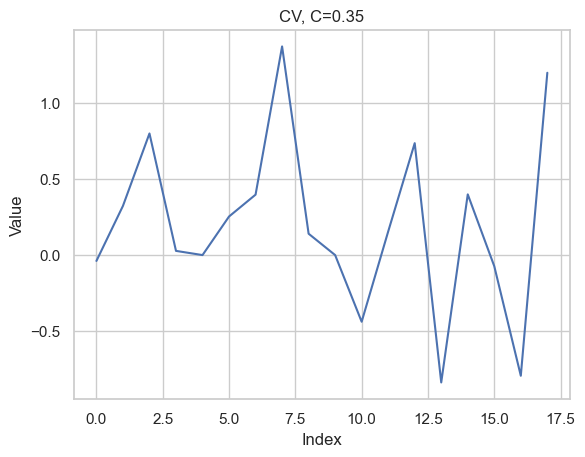

In [141]:
coef_plot(clf_CV, 'CV, C=0.35')

Confusion matrix for train, without normalization
[[15950   177]
 [  498   665]]
Normalized confusion matrix for train
[[0.98902462 0.01097538]
 [0.42820292 0.57179708]]


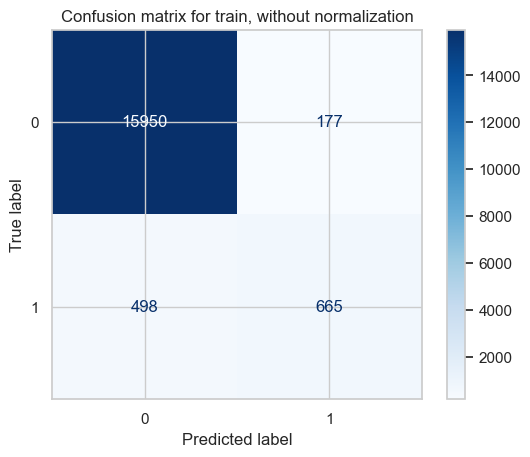

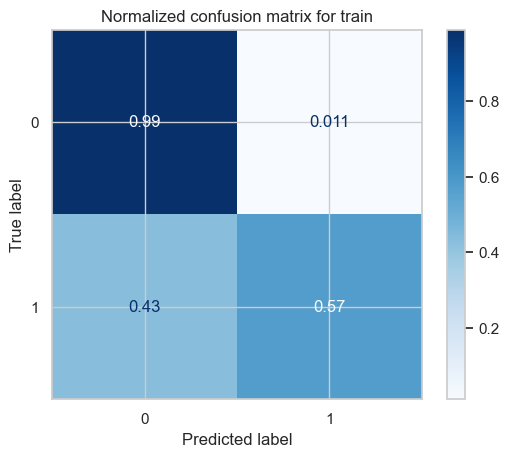

In [144]:
# Confusion matrix for Train
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_CV['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_CV, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3944   50]
 [ 123  206]]
Normalized confusion matrix for test
[[0.98748122 0.01251878]
 [0.37386018 0.62613982]]


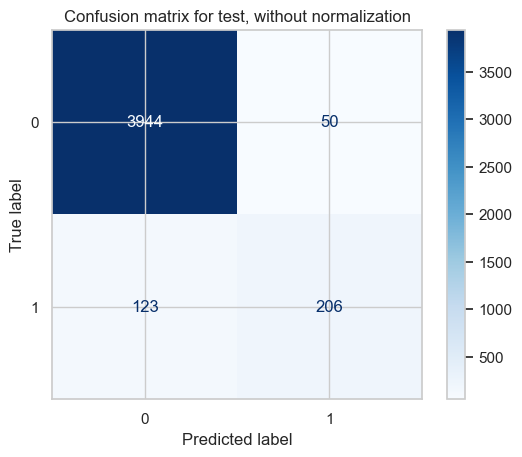

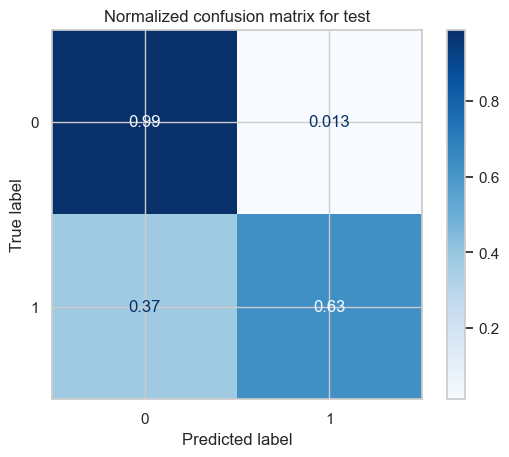

In [146]:
# Confusion matrix for Test
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf_CV['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_CV, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3944   50]
 [ 123  206]]
Normalized confusion matrix for test
[[0.98748122 0.01251878]
 [0.37386018 0.62613982]]


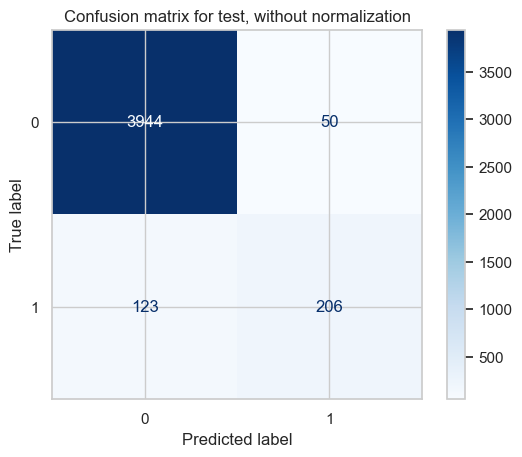

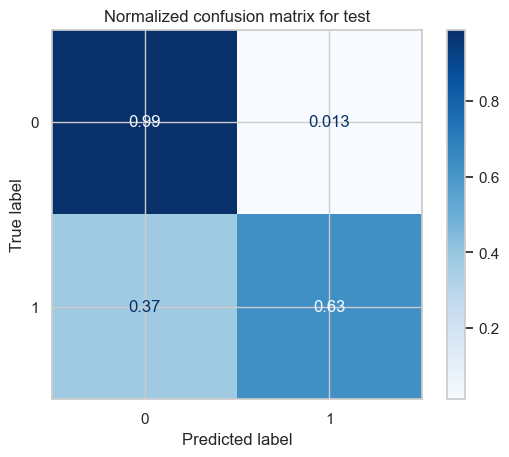

In [371]:
# Confusion matrix for Test
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

#class_names = clf_CV['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_CV, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Task 5 - Simple decision tree
Now fit a decision tree to predict `price_gt_1M`. As we did above, for both train and test, compute the accuracy score, create a confusion matrix, and discuss the performance relative to your logistic regression models. Obviously you do not need to create a coefficient plot (why not?). 

**HACKER EXTRA:** See if you can figure out how to display the fitted tree so that it's readable. :)

***Not sure I'm doing any of this section correctly, just plugging through - combined dfs for single X_test and X_train, I don't think coefficients are generated with a decision tree, because it's based on probabilities - I ended up doing the decision tree in a separate file - I couldn't get the X_test.***

In [150]:
test_df = X_test.join(y_test)
print(test_df)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  view  \
13473         2       1.00         1000      3700     1.0          0     0   
9626          3       1.00          980      9682     1.0          0     0   
21376         3       2.25         1310       915     2.0          0     0   
9036          3       2.75         2216     31215     1.0          0     0   
1007          4       2.50         2610      7091     2.0          0     0   
...         ...        ...          ...       ...     ...        ...   ...   
662           3       2.50         1640      5097     2.0          0     0   
16297         4       2.25         2330      7020     1.0          0     0   
1390          4       2.50         2740      7140     2.0          0     0   
3546          3       2.25         2120      6710     1.0          0     0   
18167         3       2.25         1840     11403     2.0          0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  y

In [152]:
train_df = X_train.join(y_train)
print(train_df)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  view  \
13067         3       2.25         1670      7881     1.0          0     0   
17417         5       2.75         3100      5298     2.0          0     0   
1290          3       2.25         2470     10290     2.0          0     0   
13137         3       1.75         2610    117176     1.0          0     0   
15815         3       1.75         1400     18002     1.0          0     0   
...         ...        ...          ...       ...     ...        ...   ...   
13704         3       1.75         2200      7200     1.0          0     0   
16144         4       2.50         2980      5896     2.0          0     0   
8586          3       2.00         2420     17859     1.0          0     1   
4014          3       1.75         2160      6272     1.0          0     0   
21398         4       2.50         1660      2500     2.0          0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  y

In [154]:
from sklearn import preprocessing

# Create a LabelEncoder object
le = preprocessing.LabelEncoder()

# Use its fit method to fit the labels in the species column
le.fit(train_df['price_gt_1M'])

LabelEncoder()

In [156]:
print(dir(le))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'classes_', 'fit', 'fit_transform', 'get_metadata_routing', 'get_params', 'inverse_transform', 'set_output', 'set_params', 'transform']


In [158]:
# Let's look at the classes that were fit
targets = list(le.classes_)
print(targets)

[0, 1]


In [160]:
encoded_target = le.transform(train_df['price_gt_1M'])
encoded_target

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [162]:
type(encoded_target)

numpy.ndarray

In [164]:
le.inverse_transform(encoded_target)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [166]:
# Add new column to train dataframe with encoded target values
train_df['target'] = le.transform(train_df['price_gt_1M'])

In [168]:
train_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price_gt_1M,target
13067,3,2.25,1670,7881,1.0,0,0,4,7,1190,480,1977,0,47.4105,-122.180,1870,7820,0,0
17417,5,2.75,3100,5298,2.0,0,0,3,7,3100,0,2007,0,47.5369,-121.887,2440,5250,0,0
1290,3,2.25,2470,10290,2.0,0,0,3,8,2230,240,1984,0,47.4459,-122.124,1970,10150,0,0
13137,3,1.75,2610,117176,1.0,0,0,3,7,1390,1220,1981,0,47.2585,-121.925,2140,142005,0,0
15815,3,1.75,1400,18002,1.0,0,0,3,6,1400,0,1977,0,47.7250,-121.967,2240,14068,0,0


In [170]:
features = list(train_df.columns[1:19])
print(features)

['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_gt_1M', 'target']


In [172]:
# Set the features variable, X for both the training and test data
X = np.array(train_df[features])

# Set the target variable, y
y = np.array(train_df["target"])

print(f"X is a {X.shape} matrix of type {type(X)}\n")
print(f"y is a {y.shape} vector of type {type(y)}\n")

X is a (17290, 18) matrix of type <class 'numpy.ndarray'>

y is a (17290,) vector of type <class 'numpy.ndarray'>



In [174]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
# Create a DecisionTreeClassifier model. 
tree_1 = DecisionTreeClassifier(min_samples_split=20)
# Fit the model using our features and target variables
tree_1.fit(X, y)
# Get % accuracy on the training data using the score() method
tree_1.score(X, y)

1.0

In [178]:
# Create a DecisionTreeClassifier model. 
tree_train = DecisionTreeClassifier(min_samples_split=20)
# Fit the model using our features and target variables
tree_train.fit(X_train, y_train)
# Get % accuracy on the training data using the score() method
tree_train.score(X_train, y_train)

0.9839213418160787

In [180]:
# Create a DecisionTreeClassifier model. 
tree_test = DecisionTreeClassifier(min_samples_split=20)
# Fit the model using our features and target variables
tree_test.fit(X_test, y_test)
# Get % accuracy on the training data using the score() method
tree_test.score(X_test, y_test)

0.981263011797363

In [182]:
from sklearn.tree import export_graphviz
import subprocess

In [184]:
def visualize_tree(tree, feature_names, dot_filename, png_filename):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecisionTree.
    feature_names -- list of feature names.
    """
    with open(dot_filename, 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", dot_filename, "-o", png_filename]
    try:
        subprocess.run(args=command, shell=True, check=True)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [186]:
visualize_tree(tree_1, features, "output/dt.dot", "output/dt.png")

In [188]:
command = ["dot", "-Tpng", "output/dt.dot", "-o", "output/dt.png"]
" ".join(command)

'dot -Tpng output/dt.dot -o output/dt.png'

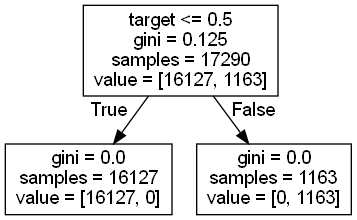

In [190]:
from IPython.display import Image
Image("output/dt.png")

Confusion matrix for train, without normalization
[[16008   119]
 [  159  1004]]
Normalized confusion matrix for train
[[0.99262107 0.00737893]
 [0.13671539 0.86328461]]


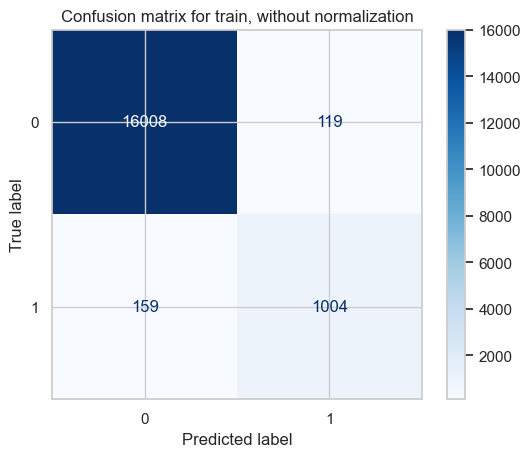

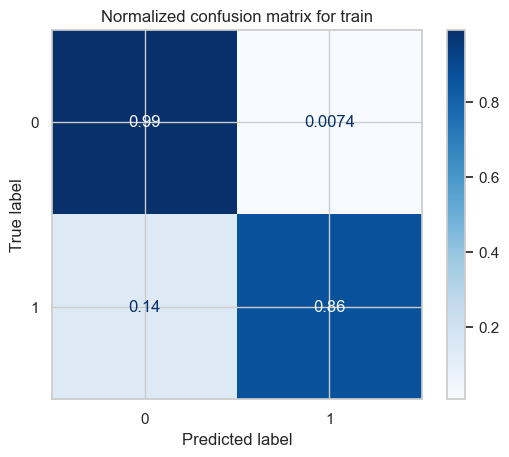

In [379]:
# Confusion matrix for Train
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(tree_train, X_train, y_train,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3961   33]
 [  48  281]]
Normalized confusion matrix for test
[[0.99173761 0.00826239]
 [0.14589666 0.85410334]]


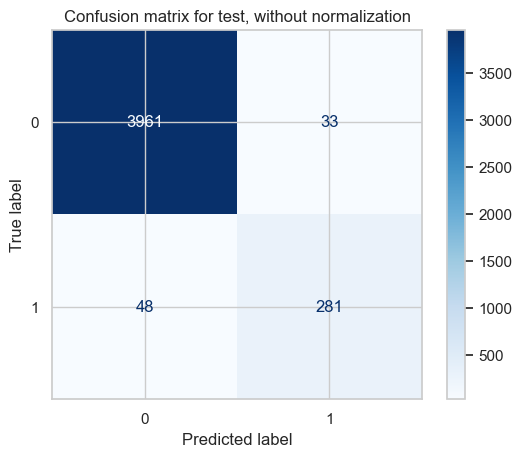

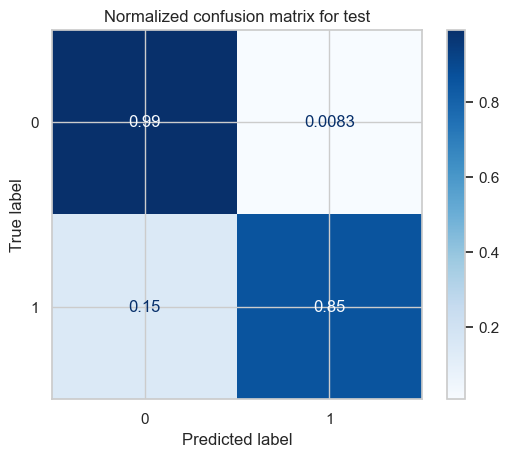

In [377]:
# Confusion matrix for Test
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(tree_test, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

***If I did the tree model correctly, that is the model with the best score - I don't know why it didn't split more, but it's readable!***

### Task 6 - a little error exploration (more challenging)

This will challenge your pandas and your general data manipulation skills. Just give it your best shot. If you don't get, you don't get it. It doesn't require much code - just the right code. :)

I also include another data file called `kc_house_data_regression.csv` in which the target variable is `price`. Everything else is exactly the same, including the order of the rows. So, here's your challenge. Using Model 2 (the lasso model with `C=1.0`), start by using the `predict` method to generate an array of predictions for the original test data. Obviously, some of the predictions are correct and some of them are not. It would be interesting to know more about the kinds of errors our model is making. We can see some things from the confusion matrix. However, since we don't have the actual `price` value, it's hard to visualize how the errors relate to it. For example, are we only making errors when the price is really close to 1 million? One way to visualize this is to create a histogram of the actual prices **only for those rows in test that we got wrong**. What makes this tricky? A few things:

* As I already mentioned, `price` is not in our original data but is in the `kc_house_data_regression.csv` dataset. Remember, other than the target variable, this dataset is identical (including the index) to the one we used above for classification.
* We partitioned the classification dataset into training and test datasets.
* In order to create the histogram, we simply need a Series (or array) of `price` values corresponding to the predictions in test that we got wrong.

**HINTS** 

* The pandas `join` method will come in handy.
* The pandas `.loc` selector can take a boolean array as an input for selecting rows or columns. Using one to select rows is quite useful for this problem.

***I made up my own, I think it turned out correctly***

In [200]:
X_test.index

Index([13473,  9626, 21376,  9036,  1007,  3294, 18747, 13705,  4404, 17853,
       ...
       15505, 21527, 14180, 20150, 10794,   662, 16297,  1390,  3546, 18167],
      dtype='int64', length=4323)

In [202]:
housingPrice_df = pd.read_csv('./data/kc_house_data_regression.csv')

In [204]:
hdf1 = pd.DataFrame(housingPrice_df['price'])
hdf1

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [206]:
hdf1['id'] = range(0, 0+len(hdf1))

In [208]:
hdf1

,price,id
0,221900.0,0
1,538000.0,1
2,180000.0,2
3,604000.0,3
4,510000.0,4
...,...,...
21608,360000.0,21608
21609,400000.0,21609
21610,402101.0,21610
21611,400000.0,21611


In [210]:
# Pipeline - l1 - C=1 - Model 2

# Final logistic regression classifier model
clf_model2_final = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline
clf_LR_final = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model2_final)])

# Fit model on training data 
clf_LR_final.fit(X_train, y_train)
print("Training score: %.3f" % clf_LR_final.score(X_train, y_train))

# Make predictions on the test data
clf_LR_final_predictions = clf_LR_final.predict(X_test)
print(clf_LR_final_predictions[:10])  # Print out a few predictions just to see what they look like

# Need to bring back the id field to create a submission file for Pump it Up competition
submit_dict = {'id': X_test.index,
              'price_gt_1M': y_test,
              'status_group': clf_LR_final_predictions}

hdf2 = pd.DataFrame(submit_dict)

Training score: 0.961
[0 0 0 0 0 0 0 0 0 0]


In [212]:
hdf2

,id,price_gt_1M,status_group
13473,13473,0,0
9626,9626,0,0
21376,21376,0,0
9036,9036,0,0
1007,1007,0,0
...,...,...,...
662,662,0,0
16297,16297,0,0
1390,1390,0,0
3546,3546,0,0


In [214]:
# applying merge, joined on id
df_merged = hdf1.merge(hdf2[['id', 'price_gt_1M', 'status_group']])
print(df_merged)

          price     id  price_gt_1M  status_group
0      221900.0      0            0             0
1      510000.0      4            0             0
2     1225000.0      5            1             1
3      662500.0     10            0             0
4      189000.0     18            0             0
...         ...    ...          ...           ...
4318   385000.0  21587            0             0
4319   520000.0  21595            0             0
4320   810000.0  21599            0             0
4321   467000.0  21601            0             0
4322   360000.0  21608            0             0

[4323 rows x 4 columns]


In [216]:
# double checked the data, contains the 4323 rows and the id and indexes match and brought in the correct price
#df_merged.to_csv('./data/merged.csv', index=False)

In [218]:
# Make a true false column
df_merged['isError'] = np.where(df_merged['price_gt_1M'] != df_merged['status_group'], True, False)
df_merged

,price,id,price_gt_1M,status_group,isError
0,221900.0,0,0,0,False
1,510000.0,4,0,0,False
2,1225000.0,5,1,1,False
3,662500.0,10,0,0,False
4,189000.0,18,0,0,False
...,...,...,...,...,...
4318,385000.0,21587,0,0,False
4319,520000.0,21595,0,0,False
4320,810000.0,21599,0,0,False
4321,467000.0,21601,0,0,False


In [220]:
error_df= df_merged.loc[df_merged['isError']==True]

In [222]:
error_df

,price,id,price_gt_1M,status_group,isError
23,1088000.0,103,1,0,True
76,950000.0,381,0,1,True
90,1030000.0,446,1,0,True
99,1280000.0,489,1,0,True
127,1250000.0,669,1,0,True
...,...,...,...,...,...
4164,1600000.0,20824,1,0,True
4228,1085000.0,21143,1,0,True
4237,1050000.0,21179,1,0,True
4297,1010800.0,21477,1,0,True


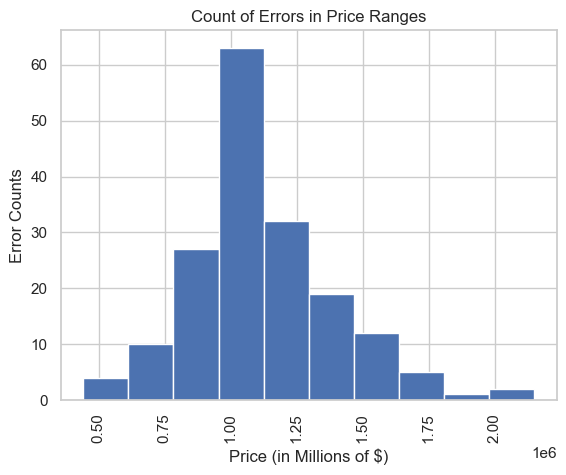

In [231]:
x = error_df['price']
plt.hist(x)
plt.xticks(rotation=90)

# Add title and axis names
plt.title('Count of Errors in Price Ranges')
plt.xlabel('Price (in Millions of $)')
plt.ylabel('Error Counts')

plt.show()

Slightly right-skewed, uni-modal, highest error counts at the $1M price range

In [291]:
# if I didn't drop zip code, instead lumped 980 and 981, then dropped full zip code
housing_df3 = housing_df
#housing_df3["zipcode"] = housing_df3["zipcode"].astype("object")
housing_df3['Zip980'] = np.where(housing_df3['zipcode'] < 98100, 1, 0)
housing_df3 = housing_df3.drop('zipcode',axis=1)
housing_df3["waterfront"] = housing_df3["waterfront"].astype("category")
housing_df3["Zip980"] = housing_df3["Zip980"].astype("category")

housing_df3

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price_gt_1M,Zip980
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,0,1
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,0,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,0,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,0,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,0,1


In [293]:
housing_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  int64   
 1   bathrooms      21613 non-null  float64 
 2   sqft_living    21613 non-null  int64   
 3   sqft_lot       21613 non-null  int64   
 4   floors         21613 non-null  float64 
 5   waterfront     21613 non-null  category
 6   view           21613 non-null  int64   
 7   condition      21613 non-null  int64   
 8   grade          21613 non-null  int64   
 9   sqft_above     21613 non-null  int64   
 10  sqft_basement  21613 non-null  int64   
 11  yr_built       21613 non-null  int64   
 12  yr_renovated   21613 non-null  int64   
 13  lat            21613 non-null  float64 
 14  long           21613 non-null  float64 
 15  sqft_living15  21613 non-null  int64   
 16  sqft_lot15     21613 non-null  int64   
 17  price_gt_1M    21613 non-null  

In [326]:
def df_column_switch(df_switch, column1, column2):
    i = list(df_switch.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df_switch = df_switch[i]
    return df_switch

In [334]:
housing_df3 = df_column_switch(housing_df3, 'price_gt_1M', 'Zip980')

In [336]:
housing_df3

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Zip980,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,1,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,0,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,0,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,0,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,1,0


In [338]:
housing_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  int64   
 1   bathrooms      21613 non-null  float64 
 2   sqft_living    21613 non-null  int64   
 3   sqft_lot       21613 non-null  int64   
 4   floors         21613 non-null  float64 
 5   waterfront     21613 non-null  category
 6   view           21613 non-null  int64   
 7   condition      21613 non-null  int64   
 8   grade          21613 non-null  int64   
 9   sqft_above     21613 non-null  int64   
 10  sqft_basement  21613 non-null  int64   
 11  yr_built       21613 non-null  int64   
 12  yr_renovated   21613 non-null  int64   
 13  lat            21613 non-null  float64 
 14  long           21613 non-null  float64 
 15  sqft_living15  21613 non-null  int64   
 16  sqft_lot15     21613 non-null  int64   
 17  Zip980         21613 non-null  

In [341]:
# Creating the initial X2 and y2
X2 = housing_df3.iloc[:, 0:18]
y2 = housing_df3.iloc[:, 18]

In [343]:
categorical_cols2 = X2.select_dtypes(include=['category']).columns.tolist()
numeric_cols2 = X2.select_dtypes(include=['number']).columns.tolist()

all_cols2 = X2.columns.tolist()

In [347]:
categorical_cols2

['waterfront', 'Zip980']

In [349]:
numeric_cols2

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [351]:
dummy_clf2 = DummyClassifier(strategy="most_frequent")
dummy_clf2.fit(X2, y2)
dummy_clf2.predict(X2)
dummy_clf2.score(X2, y2)

0.9309674732799704

In [353]:
# Further partition our training data into train and test sets to use for model fitting and testing

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=73)

In [355]:
# Pipeline - Model 1 - l1 - C=1 - version 2
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols2),
        ('cat', categorical_transformer, categorical_cols2)])

# Classifier model
clf_model = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_l1_c1_v2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [357]:
# Fit model on new training data - notice that clf is actually the Pipeline - l2 - C=1
clf_l1_c1_v2.fit(X2_train, y2_train)

print(f"Training score: {clf_l1_c1_v2.score(X2_train, y2_train):.3f}")
print(f"Test score: {clf_l1_c1_v2.score(X2_test, y2_test):.3f}")

Training score: 0.961
Test score: 0.960


In [359]:
data_list = [dummy_clf.score(X, y),
clf_l2_c1.score(X_train, y_train),
clf_l2_c1.score(X_test, y_test),
clf_l1_c1.score(X_train, y_train),
clf_l1_c1.score(X_test, y_test),
clf_l1_c01.score(X_train, y_train),
clf_l1_c01.score(X_test, y_test),
clf_l1_c035.score(X_train, y_train),
clf_l1_c035.score(X_test, y_test),
tree_train.score(X_train, y_train),
tree_test.score(X_test, y_test),
clf_l1_c1_v2.score(X2_train, y2_train),
clf_l1_c1_v2.score(X2_test, y2_test)]

col_list = (['model0', 'model1train', 'model1test', 'model2train', 'model2test', 'model3train', 'model3test', 'model4train', 'model4test', 'modelTreetrain', 'modelTreetest', 'Model1V2test', 'Model1V2train'])

In [361]:
df_compare = pd.DataFrame(list(zip(col_list, data_list)),
               columns =['Model', 'Score'])

In [363]:
print(df_compare.to_string(index=False))

         Model    Score
        model0 0.932736
   model1train 0.961018
    model1test 0.959288
   model2train 0.961018
    model2test 0.959519
   model3train 0.958994
    model3test 0.959288
   model4train 0.961018
    model4test 0.959981
modelTreetrain 0.983921
 modelTreetest 0.981263
  Model1V2test 0.960844
 Model1V2train 0.959519


***Including the zip code didn't improve the results - If I did the tree model correctly, that is the model with the best score***